In [1]:
import numpy as np
import pandas as pd
from sklearn.utils import shuffle
from matplotlib import pyplot as plt

ones = np.random.normal(5, 1, 1000)
zeros = np.random.normal(2,0.5,1000)

ones_classes=  [1 for _ in ones]
zeros_classes=  [0 for _ in zeros]

plt.scatter(ones,[1 for _ in ones], c='red', marker='o', label='1')
plt.scatter(zeros,[1 for _ in zeros], c='blue', marker='o', label='0')
plt.legend(loc='best')
plt.show()



In [ ]:
X = list(ones) + list(zeros)
y = ones_classes + zeros_classes

dataset = pd.DataFrame({"X": X, "y": y})
# dataset = shuffle(pd.DataFrame({"X": X, "y": y}))

dataset.head(10)


,X,y
0,4.923101,1
1,4.732451,1
2,4.232684,1
3,7.215346,1
4,4.840827,1
5,4.724439,1
6,4.868468,1
7,5.217640,1
8,4.846292,1
9,5.381392,1


In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X       2000 non-null   float64
 1   y       2000 non-null   int64  
dtypes: float64(1), int64(1)
memory usage: 31.4 KB


Score: 0.9775


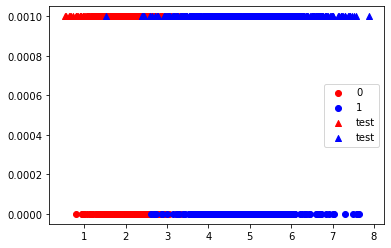

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

X = dataset[['X']]
y = dataset['y']

x_train, x_test, y_train, y_test = train_test_split(X,y,test_size=0.8, random_state=0, shuffle=True)

model = LogisticRegression(random_state=0)
model.fit(x_train, y_train)

print(f'Score: {model.score(x_test, y_test)}')

train_df = pd.DataFrame({
    'x_train': x_train['X'].values,
    'y_train': y_train.values
})
train_df_zeros = train_df[train_df['y_train'] == 0]
train_df_ones = train_df[train_df['y_train'] == 1]

y_pre = model.predict(x_test)

test_df = pd.DataFrame({
    'x_test': x_test['X'].values,
    'y_test': y_test.values
})
test_df_zeros = test_df[test_df['y_test'] == 0]
test_df_ones = test_df[test_df['y_test'] == 1]


plt.scatter(train_df_zeros['x_train'],[0 for _ in train_df_zeros['x_train']], c='red', label='0')
plt.scatter(train_df_ones['x_train'],[0 for _ in train_df_ones['x_train']], c='blue', label = '1')
plt.scatter(test_df_zeros['x_test'],[0.001 for _ in test_df_zeros['x_test']], c='red', marker='^', label='test')
plt.scatter(test_df_ones['x_test'],[0.001 for _ in test_df_ones['x_test']], c='blue', marker='^', label='test')
plt.legend(loc='best')
plt.show()